In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
def load_and_preprocess():
    """
    Load the Iris dataset and normalize it.
    """
    iris = load_iris()
    data = iris.data
    target = iris.target
    return normalize_data(data), target



In [3]:
def normalize_data(data):
    """
    Normalize the dataset to zero mean and unit variance.
    """
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std

In [4]:
def calculate_covariance_matrix(data):
    """
    Compute the covariance matrix using the dot product.
    """
    N = data.shape[0]
    return np.dot(data.T, data) / (N - 1)

In [5]:
def sort_eigenvalues_and_vectors(eigenvalues, eigenvectors):
    """
    Sort eigenvalues and eigenvectors in descending order.
    """
    sorted_indices = np.argsort(eigenvalues)[::-1]
    return eigenvalues[sorted_indices], eigenvectors[:, sorted_indices]

In [6]:
def project_data(data, eigenvectors, k):
    """
    Project the data onto the top k principal components.
    """
    top_k_eigenvectors = eigenvectors[:, :k]
    return np.dot(data, top_k_eigenvectors)

In [7]:
def get_k():
    """
    Prompt user for the number of principal components.
    """
    while True:
        try:
            k = int(input("Enter the number of principal components (k): "))
            if k > 0:
                return k
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter a positive integer.")


In [8]:
def pca(data, k):
    """
    Perform PCA on the dataset, returning the projected data.
    """
    normalized_data = normalize_data(data)
    covariance_matrix = calculate_covariance_matrix(normalized_data)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    sorted_eigenvalues, sorted_eigenvectors = sort_eigenvalues_and_vectors(eigenvalues, eigenvectors)
    
    projected_data = project_data(normalized_data, sorted_eigenvectors, k)
    return projected_data, sorted_eigenvalues[:k], sorted_eigenvalues / np.sum(sorted_eigenvalues)

In [9]:

def plot_pca(data, target, k):
    """
    Plot the data in 1D, 2D, or 3D depending on k.
    """
    # Define colors for each class
    colors = ['red', 'green', 'blue']
    plt.figure(figsize=(12,12))
    if k == 1:
        plt.scatter(data[:, 0], np.zeros_like(data[:, 0]), c=[colors[t] for t in target], edgecolors='k')
        plt.title("1D PCA Projection")
        plt.xlabel("Principal Component 1")
        plt.show()

    elif k == 2:
        plt.scatter(data[:, 0], data[:, 1], c=[colors[t] for t in target], edgecolors='k')
        plt.title("2D PCA Projection")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.show()

    elif k == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=[colors[t] for t in target], edgecolors='k')
        ax.set_title("3D PCA Projection")
        ax.set_xlabel("Principal Component 1")
        ax.set_ylabel("Principal Component 2")
        ax.set_zlabel("Principal Component 3")
        plt.show()



Projected Data (First 5 Samples):
 [[ 2.26470281  0.4800266 ]
 [ 2.08096115 -0.67413356]
 [ 2.36422905 -0.34190802]
 [ 2.29938422 -0.59739451]
 [ 2.38984217  0.64683538]]

Explained Variance (Raw):
 [2.93808505 0.9201649 ]

Explained Variance Ratio:
 [0.72962445 0.22850762]


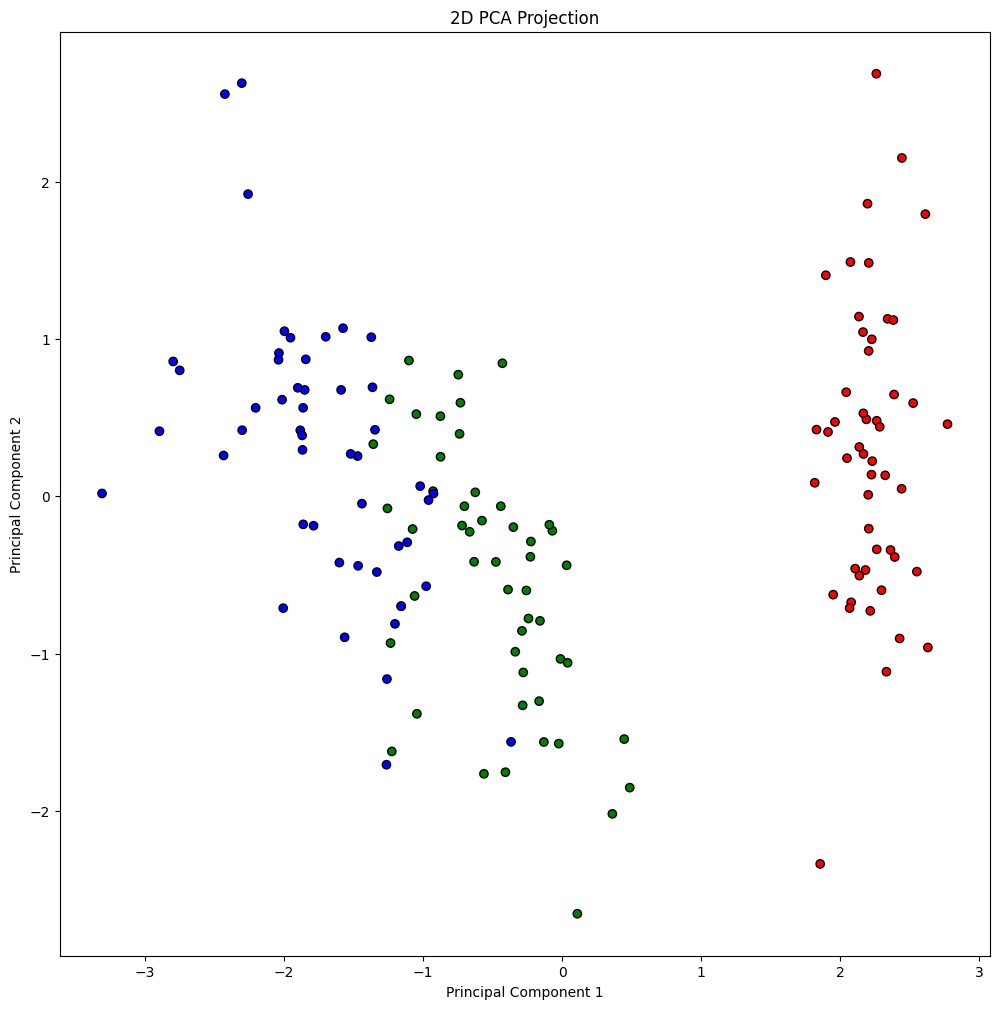

In [10]:
if __name__ == "__main__":
    normalized_data, target = load_and_preprocess()
    k = get_k()

    if k > normalized_data.shape[1]:
        print(f"Warning: k={k} exceeds the number of features. Using all features.")
        k = normalized_data.shape[1]

    projected_data, explained_variance, explained_variance_ratio = pca(normalized_data, k)

    print("\nProjected Data (First 5 Samples):\n", projected_data[:5])
    print("\nExplained Variance (Raw):\n", explained_variance)
    print("\nExplained Variance Ratio:\n", explained_variance_ratio[:k])

    plot_pca(projected_data, target, k)